In [ ]:
from langgraph.graph import StateGraph
from typing import TypedDict, List, Dict, Any
from functools import reduce 

In [6]:
class AgentState(TypedDict):
    values: List[int]
    result: str
    name: str
    operation: str

In [7]:


def calc(state : AgentState) -> AgentState:
    """
    A node that calculates the sum of multiple inputs
    """
    if state['operation'] == '+':
        state['result'] = f"Hello {state['name']}, the sum of your values is {sum(state['values'])}!"
    
    elif state['operation'] == '*':
        state['result'] = f"Hello {state['name']} , the product of ur values is {reduce(lambda x, y: x * y, state['values'])}!"

    elif state['operation'] == '-':
        state['result'] = f"Hello {state['name']} , the difference of ur values is {reduce(lambda x, y: x - y, state['values'])}!"    
    elif state['operation'] == '/':
        state['result'] = f"Hello {state['name']} , the division of ur values is {reduce(lambda x, y: x / y, state['values'])}!"

    return state     

In [8]:
graph = StateGraph(AgentState)

graph.add_node('calc', calc)
graph.set_entry_point("calc")
graph.set_finish_point("calc")
app = graph.compile()

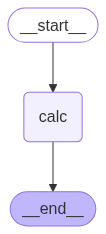

In [9]:
from IPython.display import display, HTML, Image
draw_mermaid_png = app.get_graph().draw_mermaid_png
display(Image(draw_mermaid_png())) #Display the graph as a mermaid diagram

In [14]:
result = app.invoke({"values": [1, 2, 3], "name": "Alice", "operation": "/"}) #Invoke the app with a list of values and a name
result['result'] #Display the result message

'Hello Alice , the division of ur values is 0.16666666666666666!'